### using PCA to explore the data distribution

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array

# Now, we need to compare the features captured by vgg16, resnet50
# from keras.applications.vgg16 import preprocess_input (origin)
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.resnet import preprocess_input as resnet50_preprocess_input

# models 
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from random import randint
import pandas as pd
import pickle

from pathlib import Path
import shutil

def extract_features(file, model, preprocess_input):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [2]:
models = [VGG16(), ResNet50()]
preprocess_inputs = [vgg16_preprocess_input, resnet50_preprocess_input]
model, preprocess_input = models[0], preprocess_inputs[0]

model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
data = {}  # name: [feature, category]
path = Path(r"D:\Luke\PCA\Class-61")
images = [i for i in path.glob('**/*.png')]
for image in images:
    data[image.name] = [extract_features(image, model, preprocess_input), image.parent.name, image]
    

X = np.array([data[k][0] for k in data])
print(X.shape)
print(X)
X = X.reshape(-1,4096)
print(X.shape)
print(X)


pca = PCA(2)
pca.fit(X)
print(pca.explained_variance_ratio_)
X = pca.transform(X)
print(X)


(1178, 1, 4096)
[[[0.         0.         0.945807   ... 1.2204665  1.0281838  0.        ]]

 [[0.         1.0149585  0.7666166  ... 0.5549848  0.         0.        ]]

 [[0.16998994 0.7759385  0.         ... 1.7585149  0.41682446 0.        ]]

 ...

 [[0.         0.         0.         ... 3.603019   0.         1.1851091 ]]

 [[0.         0.         0.         ... 2.7058618  0.         0.7611232 ]]

 [[0.         0.         0.         ... 1.7518497  0.         0.56998646]]]
(1178, 4096)
[[0.         0.         0.945807   ... 1.2204665  1.0281838  0.        ]
 [0.         1.0149585  0.7666166  ... 0.5549848  0.         0.        ]
 [0.16998994 0.7759385  0.         ... 1.7585149  0.41682446 0.        ]
 ...
 [0.         0.         0.         ... 3.603019   0.         1.1851091 ]
 [0.         0.         0.         ... 2.7058618  0.         0.7611232 ]
 [0.         0.         0.         ... 1.7518497  0.         0.56998646]]
[0.11975832 0.09187499]
[[ -5.252034  -13.295932 ]
 [ -7.402963  

category
Bridge         43
Broken          5
DryJoint       17
ExesSolder      2
Flipover       33
Missing        54
NTF            10
NoSolder        7
Particle       65
Pass          584
Scratch         3
Shift         309
Tombstone      20
WrongPart      26
dtype: int64


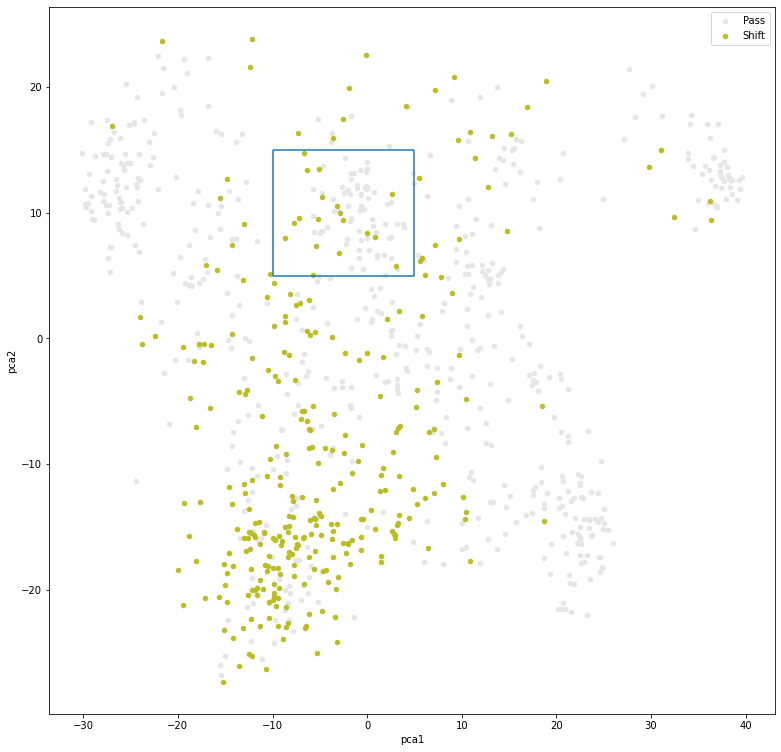

,pca1,pca2,filename,category,filepath
0,-5.252034,-13.295932,2020-10-14 10;06;16_FF0EF6FB-8E00-371E-A504-3F...,Bridge,D:\Luke\PCA\Class-61\Bridge\2020-10-14 10;06;1...
1,-7.402963,-12.762373,2020-10-14 10;08;01_300589F0-5D68-3C37-9230-29...,Bridge,D:\Luke\PCA\Class-61\Bridge\2020-10-14 10;08;0...
2,3.058573,-4.660173,2020-10-16 17;26;17_AACB7EA5-3038-37B6-8BAB-5D...,Bridge,D:\Luke\PCA\Class-61\Bridge\2020-10-16 17;26;1...
3,-1.039444,-16.610874,2020-11-02 12;37;24_1C2BFC45-34DB-3F3F-9BA3-21...,Bridge,D:\Luke\PCA\Class-61\Bridge\2020-11-02 12;37;2...
4,-21.492495,7.707835,2020-12-02 05;10;23_988E4135-B0DB-3951-B1FD-00...,Bridge,D:\Luke\PCA\Class-61\Bridge\2020-12-02 05;10;2...
...,...,...,...,...,...
1173,8.309850,1.882424,2020-12-09 05;38;07_502C8237-DC05-3BBD-9A17-83...,WrongPart,D:\Luke\PCA\Class-61\WrongPart\2020-12-09 05;3...
1174,5.917603,18.207172,2020-12-09 05;38;07_73D24720-24F3-379C-A24B-A3...,WrongPart,D:\Luke\PCA\Class-61\WrongPart\2020-12-09 05;3...
1175,6.052432,16.662098,2020-12-09 05;38;24_61D4B424-41A4-329B-AFB4-EC...,WrongPart,D:\Luke\PCA\Class-61\WrongPart\2020-12-09 05;3...
1176,8.104815,11.833073,2020-12-09 05;38;41_A49E46A7-8076-3DE1-AAAE-A0...,WrongPart,D:\Luke\PCA\Class-61\WrongPart\2020-12-09 05;3...


In [3]:
fig, ax = plt.subplots(figsize=(13, 13))
df = pd.DataFrame(data={'pca1': [x[0] for x in X], 
                        'pca2': [x[1] for x in X], 
                        'filename':[k for k in data.keys()],
                        'category': [d[1] for d in data.values()],
                        'filepath':[d[2] for d in data.values()]})
grouped = df.groupby('category')
print(grouped.size())
colors = {'BigPicture':'tab:blue',
          'Bridge':'tab:orange',
          'DryJoint':'tab:green',
          'Flipover':'tab:red',
          'Missing':'tab:purple',
          'NoSolder':'tab:brown',
          'Particle':'tab:pink',
          'Pass':'0.9',
          'Shift':'tab:olive',
          'Tombstone':'tab:cyan',
          'Broken':'#7FFFD4',
          'ExesSolder':'#000080',
          'NTF':'gold',
          'Scratch':'sandybrown',
          'WrongPart':'maroon'
         }
# given coordination to plot a square
x1, y1, x2, y2 = -10,15,5,5
lines = [[(x1, y1), (x1, y2)], [(x1, y2), (x2, y2)], [(x2, y2), (x2, y1)], [(x2, y1), (x1, y1)]]
lc = mc.LineCollection(lines)
ax.add_collection(lc)

# draw some types controlled by ignore
ignore = ["Shift"]
for key, group in grouped:
    if key in ["Pass", "Shift"]:
        group.plot(ax=ax, kind='scatter', x='pca1', y='pca2', label=key, color=colors[key])
plt.show()
df

In [4]:
def coordinate_filter(x1, y1, x2, y2, df, concern):
    df = df.loc[(df['pca1'] >= x1) & (df['pca1'] <= x2) & (df['pca2'] >= y2) & (df['pca2'] <= y1) &
               (df['category'].isin(concern))]
    return df


def extract_image(df):
    target_path = Path(r"D:\Luke\PCA\selected_image")
    for index, row in df.iterrows():
        print(row['category'])
        (target_path/Path(row['category'])).mkdir(exist_ok=True)
        print(row['filepath'])
        shutil.copy(row['filepath'], str((target_path/Path(row['category']))))
    
concern = ["Pass", "Shift"]
selected = coordinate_filter(x1, y1, x2, y2, df, concern)
extract_image(selected)


Pass
D:\Luke\PCA\Class-61\Pass\2020-11-19 02;46;56_6D91AFD3-6621-390C-86FC-876071A63F85_(SP01002XM00)_(JKB1)_['0.03 0.97']_{锡少}_1_180_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-11-19 03;15;32_43FBD4F6-0281-3EFB-AE47-5449C2D61D49_(SP01002XM00)_(JKB1)_['0.00 1.00']_{锡少}_2_0_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-11-19 21;07;58_FC882828-02E8-3C82-9BE9-C64172333162_(SP01002XM00)_(JKB1)_['0.00 1.00']_{位移1}_2_0_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-11-21 00;27;59_F106F711-CFCF-3AC6-805A-8194325F4917_(SP01002XM00)_(JKB1)_['0.00 1.00']_{位移1}_1_180_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-12-08 00;28;35_3B71360C-B379-35F6-A2BE-C71EABCA9B00_(SP01002XM00)_(JKB1)_['0.02 0.98']_{位移1}_1_180_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-12-24 13;12;27_AF5ED6A2-C15F-3CF7-8B29-BB9903C490B9_(SP01002W200)_(JKB1)__{短路}_1_180_None.png
Pass
D:\Luke\PCA\Class-61\Pass\2020-12-24 19;34;13_B688A419-865E-3C0F-9A6F-4D8A2010CBFF_(SP01002W200)_(JKB1)__{短路}_1_180_None.png
Pass
D:\Luke\PCA\Class-61\

### ref
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c